# **CAPSTONE PROJECT ON ANALYZING EVOLUTION OF THE OLYMPICS**

##**INTRODUCTION**:-

Olympic Games are one of the main international event and also a matter of
prestige for countries and therefore each country tries to give their best performance during the
event. Despite a lot of hard work, many countries/player are unable to perform well during
the events and grab medals whereas there are many countries which performs very well in the
event and secures many medals.

An Analysis need to be done by each country to evaluate the
previous statistics which will detect the mistakes which they have done previously and will also
help them in future development. 

An analysis can also be done by the host country to find
out the mistakes in the arrangements of the Event which will help them in overcoming these
mistakes and host the event accurately. 

The primary objective is to
analyze the large Olympic dataset using Data Analysis to evaluate the evolution
of Olympic Games over the years. This analysis will provide detailed and accurate information
regarding various factors which leads to the evolution of Olympic Games and improvement of
Countries/Players over the time in visual format. 

Visualization of the data over various factors
will provide us with the statistical view of the various factors which leads to the evolution of the
Olympic Games and Improvement in performance of various Countries/Players over the time.

There are various scenarios which comes in our mind when we look into Evolution of Olympic
Games over the years. These scenarios are: Increase in number of participating nations, Increase
in number of participating Athletes, Increase/Decrease in number of events, Increase in the
expenditure cost of the event, improvement in performance of particular country, improvement
in performance of a particular player, analysis over these scenarios would depict the
evolution of the Olympics over the years. 

### **Using PYTHON and DATA STRUCTURE:-**

**1-Please do the basic exploration of the data. Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.**

In [107]:
#Importing libraries to perform numerical tasks and to plot graphs.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/olympix_data_organized_with_header (1) (1).csv') #reading the csv file
df.info() #to get the datatypes of the Columns.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


From above, we have successfully load the file to get all raw data.

We can see there are 10 attributes and 8618 variables. Lets check the variable details and its statistical datatypes.

1. Name :- Its is the name of the Athlete( Catagorical Data)
2. Age :- Age of the Athlete.(Numerical Data)
3. Country :- Name of the country for which the Athlete is representing(categorical data)
4.year :- Olympic game year.(Numerical Data)
5. Date_given :- The date when he/she received the medal(Numerical Data)
6.Sports:- Sports/games athlete plays for(Categorical Data)
7. Gold_medal- Gold Medal won by Athlete(Numerical Data)
8. Silver_medal - Silver Medal won by Athlete(Numerical Data)
9. Brone Medal :-Brone Medal won by Athlete(Numerical Data)
10.Total_medal :- Total medal, sum of gold, silver, brone medal(Numerical Data)

From above, we can see how the Python is reading the datatypes. 
We can conclude that all the datatypes has been read correctly except for Date_given which should be in integer/datetime. 

We have get that changed in next code.

In [108]:
df['year'] = pd.to_datetime(df['year']) #Changing the datatype of year column.

In [109]:
df['Date_Given'] = pd.to_datetime(df['Date_Given']) #Changing the datatype of year column.

#print(df.to_string())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8618 non-null   object        
 3   year          8618 non-null   datetime64[ns]
 4   Date_Given    8618 non-null   datetime64[ns]
 5   sports        8618 non-null   object        
 6   gold_medal    8618 non-null   int64         
 7   silver_medal  8618 non-null   int64         
 8   brone_medal   8618 non-null   int64         
 9   total_medal   8618 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 673.4+ KB


**Conclusion**:- Hence we have loaded all the raw data and changed its datatype and we can see there are 10 attributes and 8618 variables.

**Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.**


In [110]:
df.isnull().sum() #checking for null values.

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [111]:
df2 = df.dropna(subset=['name','age']) #Dropping the null values from name and age column
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8613 non-null   object        
 3   year          8613 non-null   datetime64[ns]
 4   Date_Given    8613 non-null   datetime64[ns]
 5   sports        8613 non-null   object        
 6   gold_medal    8613 non-null   int64         
 7   silver_medal  8613 non-null   int64         
 8   brone_medal   8613 non-null   int64         
 9   total_medal   8613 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 740.2+ KB


**Conclusion** :- From above, we have successfully got the 5 null values which belongs to the column Name and Age, Since Name is the Catagorical Data, we will get that removed and the age is also related to the Athlete name we will also get that removed.

Hence, we have successfully dropped those 5 rows which has missing values.

**Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.**

In [112]:
df.duplicated().sum() #to get the duplicate values count

3

In [113]:
df2.loc[df2.duplicated(), :] #to get the location/column of duplicate values

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal


In [114]:
df.drop_duplicates() #dropping the duplicate values

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,1970-01-01 00:00:00.000002008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,1970-01-01 00:00:00.000002004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,1970-01-01 00:00:00.000002012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,1970-01-01 00:00:00.000002008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,1970-01-01 00:00:00.000002000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,1970-01-01 00:00:00.000002000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,1970-01-01 00:00:00.000002000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,1970-01-01 00:00:00.000002000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,1970-01-01 00:00:00.000002000,2000-10-01,Archery,0,0,1,1


**Conclusion** :- From above, we have successfully removed duplicate values. Now after cleaning we have 8615 variables with 10 attributes.

**Please remove special characters from the name column.**


In [115]:
df=df.replace('\*','',regex=True) #removing special characters using replace function
df.head() #displaying 5 results

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,1970-01-01 00:00:00.000002008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,1970-01-01 00:00:00.000002004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,1970-01-01 00:00:00.000002012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,1970-01-01 00:00:00.000002008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,1970-01-01 00:00:00.000002000,2000-10-01,Gymnastics,2,1,3,6


**Conclusion** : From above, we have successfully removed all the special characters from the dataset.

**Please check if the age dataset is skewed or symmetric. Based on the results perform the transformation.**

In [116]:
df['age'].skew()
#getting skew value


0.8590070668484233

In [117]:
df['age'].mode() #getting mode

0    24.0
dtype: float64

In [118]:
df['age'].mean() #getting mean

26.405433646812956

In [119]:
df['age'].median() #getting median

26.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


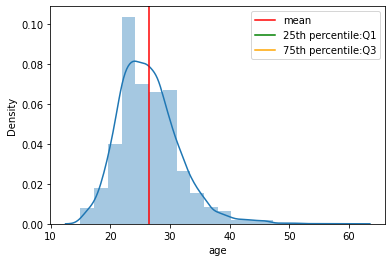

In [120]:
sns.distplot(df['age'], bins = 20) #to get the distribution plot
plt.axvline(x=np.mean(df['age']), color='red', label='mean') #plotting vertical lines
plt.axvline(x=np.percentile(df['age'],25),color='green', label = '25th percentile:Q1') 
plt.axvline(x=np.percentile(df['age'],75),color ='orange',label = '75th percentile:Q3' )
plt.legend()

From above, we can see that the data is moderately skewed. Hence we will follow below transformation techniques to get the graph symmetrical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


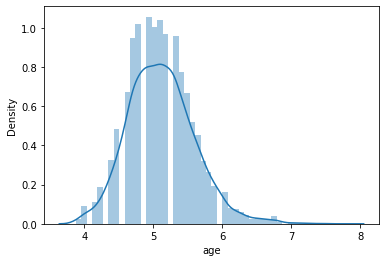

In [121]:
sqrt_age = df['age'] ** (.5)
sqrt_age.head()
sns.distplot(sqrt_age)

#using square root transformation method and plotting the graph

After transforming, the data is definitely less skewed, but there is still a long right tail.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


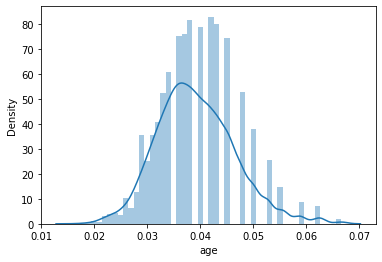

In [122]:
resipocal_age = 1/df['age']
sns.distplot(resipocal_age)

#using reciprocal method

Still not great, the above distribution is not quite symmetrical.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


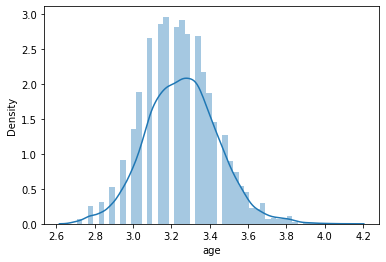

In [123]:
log_age = np.log(df['age'])
sns.distplot(log_age)

#using log transformation method

In [124]:
log_age.mean()

3.2556995620212654

In [125]:
log_age.median()

3.258096538021482

In [126]:
log_age.mode()

0    3.178054
dtype: float64

The log transformation seems to be the best, as the distribution of transformed age is the most symmetrical.

**Conclusion** :- From above, we can confirm that the age data was moderately skewwed with the skeweness of 0.85 and using Log-Transformation, we have get the graph which is more symmetrical.

**Perform data visualization techniques to appropriate columns and explain them.**


In [127]:
df['year'] = pd.to_numeric(df['year']) 
df['year'].value_counts()


2008    1872
2000    1840
2004    1839
2012    1776
2006     443
2010     441
2002     407
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No. of Athlete')

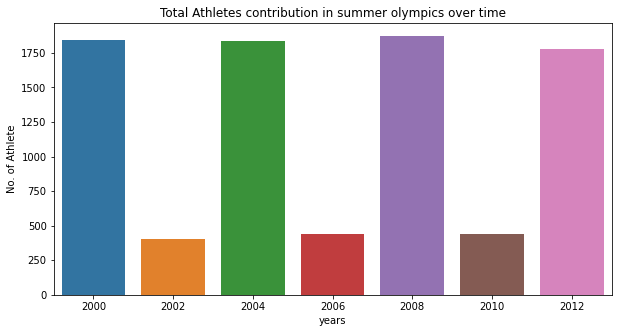

In [128]:
plt.figure(figsize=(10, 5)) #resizing the graph
sns.countplot(df['year']) #gettning count plot
plt.title('Total Athletes contribution in summer olympics over time') #titling the graph
plt.xlabel('years') #labelling the x - axis
plt.ylabel('No. of Athlete') #labelling the y-axis

From above, we have get the Athletes counts over years. We can see in year 2008, we have the maximum athlet count of almost 1872, followed by year 2000 with the count of 1840.

Hence, we can conclude that the years are not affecting the athlets contribution. For few years it is at peak and for some years its at lowest at the range of 500s. 

Therefore, we can confirm that the summer and winter olympics plays important role for the contribution of athlets. Summer Olympics are having more contribution of Athlets.

In [129]:
top_10 = df['country'].value_counts()[:10] #getting counts of the medals
top_10.head(10)

United States    1109
Russia            706
Germany           552
Australia         524
China             450
Canada            351
Italy             307
Great Britain     296
France            287
Netherlands       286
Name: country, dtype: int64

Text(0, 0.5, 'No. of medals')

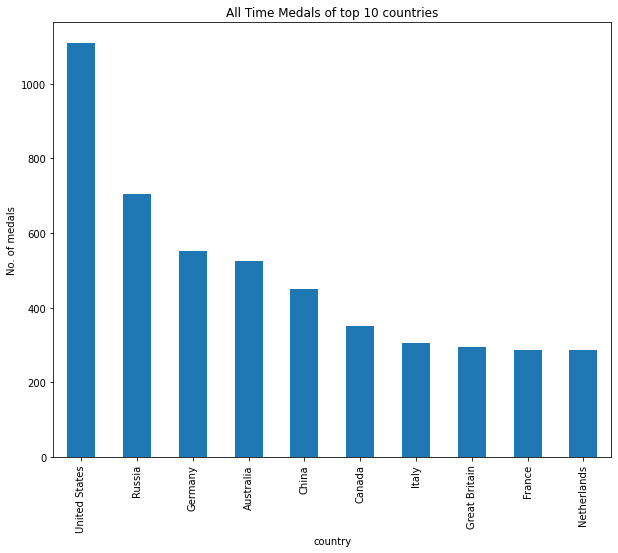

In [130]:
top_10.plot(kind='bar',figsize=(10,8)) #plotting the graph for top 10 countries for medals.
plt.title('All Time Medals of top 10 countries')
plt.xlabel('country') #labelling the x - axis
plt.ylabel('No. of medals') #labelling the y-axis

From above, we can see the top 10 countries which has highest number of Medals.

We can see United States has highest number of medals with the count of 1109, followed by Russia with 706 medals.

In [131]:
athlete_order = df.groupby(['name'])['total_medal'].sum().sort_values(ascending=False).head(20)
print(athlete_order)


name
Michael Phelps             22
Natalie Coughlin           12
Ryan Lochte                11
Leisel Jones                9
Ole Einar Bjørndalen        9
Ian Thorpe                  9
Dara Torres                 8
Jason Lezak                 8
Apolo Anton Ohno            8
Inge de Bruijn              8
Katalin Kovács              8
Petria Thomas               7
Veronica Campbell-Brown     7
Felix Gottwald              7
Kati Wilhelm                7
Valentina Vezzali           7
Kirsty Coventry             7
Libby Lenton-Trickett       7
Bradley Wiggins             7
Marit Bjørgen               7
Name: total_medal, dtype: int64


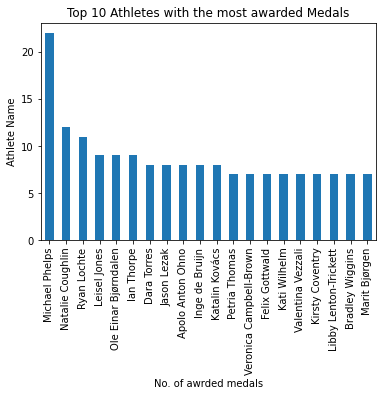

In [132]:
athlete_order.plot(kind = "bar")
plt.title('Top 10 Athletes with the most awarded Medals')
plt.xlabel('No. of awrded medals')
plt.ylabel('Athlete Name');

From above, we have successfully plot the Top 10
Athletes and we can conclude that the Michel Phelps has won total 22 medals which is highest in number.

In [133]:
highest_sport = df['sports'].value_counts() #counting the values for sports for which medal has been received
print(highest_sport)

Athletics                    687
Rowing                       567
Swimming                     487
Football                     407
Hockey                       388
Ice Hockey                   384
Handball                     351
Waterpolo                    306
Canoeing                     295
Basketball                   287
Volleyball                   281
Cycling                      261
Wrestling                    245
Fencing                      230
Judo                         224
Baseball                     216
Sailing                      210
Gymnastics                   194
Boxing                       188
Shooting                     181
Weightlifting                180
Equestrian                   157
Softball                     134
Cross Country Skiing         128
Diving                       113
Taekwondo                    112
Synchronized Swimming        109
Speed Skating                103
Short-Track Speed Skating     96
Biathlon                      94
Badminton 

Text(0, 0.5, 'No. of Medals')

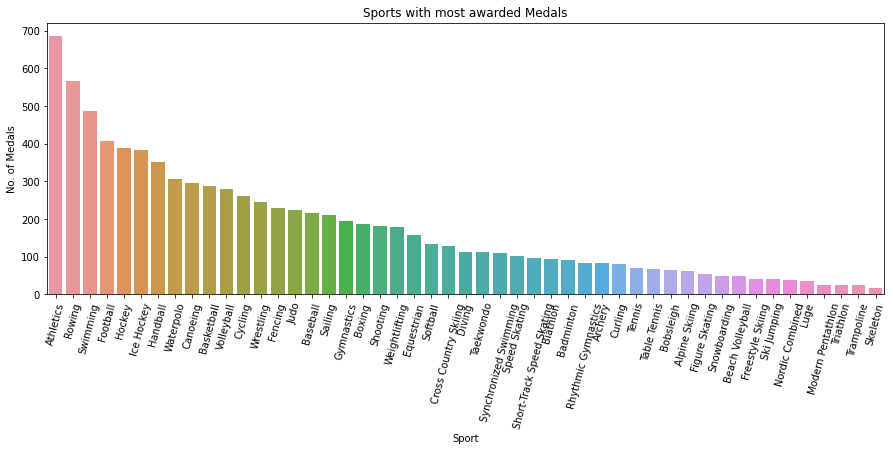

In [134]:
plt.figure(figsize=(15, 5)) #resizing the graph
highest_sport = df['sports'].value_counts().index #getting counts
sns.countplot(data=df, x='sports', order=highest_sport) #getting count plot
plt.xticks(rotation=75)
plt.title('Sports with most awarded Medals') #titling the graph
plt.xlabel('Sport') #labelling x axis
plt.ylabel('No. of Medals') #labelling y axis

Conclusion :- From above, we have get the the plot of the sports as per the medals and we can clearly see that the Athletics is the most popular sports and the total medal given for this sports was 687 and the Skeleton has lowest number of medals of count 18.

**Conclusion** :- Hence we have successfully visualize the required columns of the given dataset and we have got the idea of the Athlets, their sports and Olympic years contribution.

**Please perform appropriate numerical measures on each column and report them accordingly.**


In [135]:
df.mean() #getting mean of the dataframe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age               26.405434
year            2005.978881
gold_medal         0.364702
silver_medal       0.363309
brone_medal        0.377698
total_medal        1.105709
dtype: float64

In [136]:
df.std() #calculating the standard deviation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                                 5.102118
year                                4.289946
Date_Given      1552 days 11:22:54.515216720
gold_medal                          0.545349
silver_medal                        0.511613
brone_medal                         0.505005
total_medal                         0.408892
dtype: object

In [137]:
df.median() #getting mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age               26.0
year            2006.0
gold_medal         0.0
silver_medal       0.0
brone_medal        0.0
total_medal        1.0
dtype: float64

In [138]:
df.var() #getting variance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age             26.031610
year            18.403639
gold_medal       0.297405
silver_medal     0.261748
brone_medal      0.255030
total_medal      0.167193
dtype: float64

In [139]:
from scipy.stats import iqr
iqr(df['total_medal']) #getting IQR

0.0

In [140]:
print(df.skew()) #getting skew


age             0.859007
year           -0.001965
gold_medal      1.639667
silver_medal    0.952980
brone_medal     0.762999
total_medal     5.582673
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [141]:
df.describe() #geting all numerical measures details

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


From above, we can see the max age is 61 and min is 15 for the athlete and the max medal won by the Athlete is 8.

Conclusion:- The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

So we have used describe function to get all the statistical measures in one attempt. 

We have also used the function to get mean, median, mode and standard deviation of the provided columns.

The explaination of function used to get the statistical measures are as follows:

mean() This function calculates the arithmetic mean or average value of sample data in sequence or iterator. We have got the mean value for the column Count.

median () This function calculates middle value of thearithmetic data in iterative order. 

mode() This function return the most common data point from discrete or nominal data or number with maximum number of occurrences.

Quartiles − The most common percentile other than the median are quartiles. The first quartile indicated by Q1 is the 25th percentile, the third quartile indicated by Q3 is the 75th percentile. The quartiles containing the median, provide some indication of the center, spread, and shape of a quartile is a simple measure of spread that provides the range covered by the middle half of the data. This is known as the interquartile range (IQR) and is defined as −

IQR=Q3−Q1

Standard deviation − When the deviate values are squared in variance, their unit of measure is squared also.

**Please list the top 10 countries with the gold medal, then the top10 countries with the silver medal, then the bronze medal and the total medal.**

In [142]:
#grouping the country, aggregating the sum of gold medal attribute and sorting in descending order to get top 10.
#displaying top 10 results

gold = df.groupby(['country'])['gold_medal'].sum().sort_values(ascending=False).head(10)
print(gold)


country
United States    552
Russia           234
China            234
Germany          223
Canada           168
Australia        163
Great Britain    124
South Korea      110
France           108
Netherlands      101
Name: gold_medal, dtype: int64


From above, we can see US is on top for Gold Medal with 552,followed by Russia with 234 medals.

In [143]:
#grouping the country, aggregating the sum of silver medal attribute and sorting in descending order to get top 10.
#displaying top 10 results

silver = df.groupby(['country'])['silver_medal'].sum().sort_values(ascending=False).head(10)
print(silver)

country
United States    440
Australia        226
Russia           221
Germany          183
China            156
Netherlands      135
Spain            116
Japan            112
France           107
Italy            103
Name: silver_medal, dtype: int64


From above we can see US is on top for silver medal with 440 medals, followed by Australia with 226.

In [144]:
#grouping the country, aggregating the bronze of gold medal attribute and sorting in descending order to get top 10.
#displaying top 10 results

bronze = df.groupby(['country'])['brone_medal'].sum().sort_values(ascending=False).head(10)
print(bronze)

country
United States    320
Russia           313
Germany          223
Australia        220
Italy            142
China            140
Japan            113
South Korea      105
Canada           104
France           103
Name: brone_medal, dtype: int64


From above, we can see US is on top with 320, followed by Russia wih 313 medals in bronze.

In [145]:
#grouping the country, aggregating the sum of total medal attribute and sorting in descending order to get top 10.
#displaying top 10 results

total_medal = df.groupby(['country'])['total_medal'].sum().sort_values(ascending=False).head(10)
print(total_medal)

country
United States    1312
Russia            768
Germany           629
Australia         609
China             530
Canada            370
Italy             331
Great Britain     322
France            318
Netherlands       318
Name: total_medal, dtype: int64


**Conclusion** :- From above we can clearly see that United states is on top for all medals(gold, silver and bronze) with total medals of 1312 and Russia is on 2nd position which is almost half of US medals with the count of 768.

# **PySpark**

**Write PySpark code to read the olympix_data.csv file**





In [146]:
pip install pyspark 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [148]:
from pyspark.sql.functions import udf,col #importing pyspark function to perform sql tasks.

#loading csv file.
df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")

In [149]:
df.show(5) #displaying top 5 results

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

From above, we have successfully loaded the CSV file and displayed the result using Pyspark.

**Write PySpark code to print the Olympic Sports/games in the dataset**

In [150]:
#creating temporary table using SQL functions
df.createOrReplaceTempView("table1")

#getting sql query to get count of distinct sports/games in dataset
res1 = spark.sql("select distinct(sports) from table1")

#displaying the output
res1.show(50)

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

From above, we have successfully coded to get the names of Sports/games being playe in Olympics.

**Write PySpark code to plot the total number of medals in  each Olympic Sport/game**


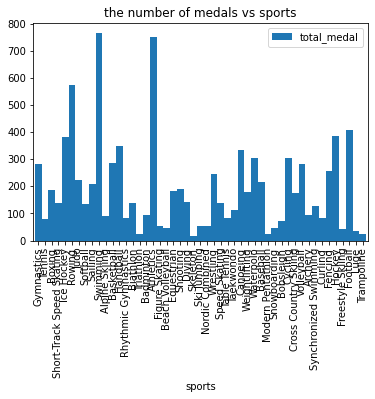

In [172]:
import matplotlib.pyplot as plot #importing library to get the plot
res = df.groupBy("sports").agg({"total_medal":"sum"}) #grouping the data for sports and gettibng sum of total medals.


res = res.withColumnRenamed("sum(total_medal)","total_medal")
get_Pandas_DF = res.toPandas() # we can use toPandas() for converting pyspark dataframe to Pandas dataframe


get_Pandas_DF.plot.bar(x="sports",y="total_medal",title="the number of medals vs sports",width = 1) #plotting graph
plot.show()

In [177]:
get_Pandas_DF.head(20)

,sports,total_medal
0,Gymnastics,282
1,Tennis,78
2,Boxing,188
3,Short-Track Speed Skating,138
4,Ice Hockey,384
5,Rowing,576
6,Judo,224
7,Softball,134
8,Sailing,210
9,Swimming,765


**Conclusion** :- From above, we have get the the plot of the sports as per the medals and we can clearly see that the Athletics is the most popular sports and the total medal given for this sports was 687 and the Skeleton has lowest number of medals of count 18

**Sort the result based on the total number of medals.**

In [179]:
#sorting the data based on total medals and displaying top 5 results
df.sort(desc("total_medal")).show(5)


+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

Conclusion:- From above, we have successfully sorted the data as per the total number of medals and we can see Michael Phelps is on Top with 8 medals on year 2004 and 2008.

**Find the total number of medals won by each country in swimming.**


In [153]:

#importing dependancies

from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col, desc, asc, count


#applying filter to get swimming variables.
#grouping by countries and getting sum of total medal

x = df.filter("sports == 'Swimming'").groupBy("country").sum("total_medal")
#sorting data in descending order
#displaying result
x.sort(desc("sum(total_medal)")).show(200)


+-------------------+----------------+
|            country|sum(total_medal)|
+-------------------+----------------+
|      United States|             267|
|          Australia|             163|
|        Netherlands|              46|
|              Japan|              43|
|             France|              39|
|              China|              35|
|            Germany|              32|
|             Russia|              20|
|              Italy|              16|
|      Great Britain|              11|
|       South Africa|              11|
|             Sweden|               9|
|            Hungary|               9|
|             Brazil|               8|
|            Ukraine|               7|
|           Zimbabwe|               7|
|            Romania|               6|
|             Canada|               5|
|        South Korea|               4|
|             Poland|               3|
|            Austria|               3|
|            Tunisia|               3|
|              Spain|    

From above, we have sorted the data to check which country is on top for swimming and we can conclude again United States has received the maximum number of medals in swimming as well.

**Find the total number of medals won by each country in Skeleton.**


In [154]:
#applying filter to get swimming variables.
#grouping by countries and getting sum of total medal

x = df.filter("sports == 'Skeleton'").groupBy("country").sum("total_medal")
#sorting data in descending order
#displaying result
x.sort(desc("sum(total_medal)")).show(20)

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Canada|               4|
|Great Britain|               3|
|  Switzerland|               3|
|United States|               3|
|      Germany|               2|
|       Russia|               1|
|      Austria|               1|
|       Latvia|               1|
+-------------+----------------+



From above, we can see Canada has won 4 medals in skeleton and only 7 countries are participating in this game. It is the most unpopular sports.

**Find the number of medals that the US won yearly.**


In [155]:
#getting sum of total medals, grouping it by year and filtering data for United states.

y = df.filter("country == 'United States'").groupBy("year").sum("total_medal")
#sorting data in descending order
#displaying result
y.sort(desc("sum(total_medal)")).show(20)

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2008|             317|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2002|              84|
|2006|              52|
+----+----------------+



From above, we can see the United States has won maximum medals on year 2008 and lowest medals on 2006 with the medal count of 52


**Find the total number of medals won by each country.**


In [156]:
#getting sum of total medals and grouping it by country

z = df.groupBy("country").sum("total_medal")

#sorting data in descending order and displaying top 20 results.
z.sort(desc("sum(total_medal)")).show(20)

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|United States|            1312|
|       Russia|             768|
|      Germany|             629|
|    Australia|             609|
|        China|             530|
|       Canada|             370|
|        Italy|             331|
|Great Britain|             322|
|       France|             318|
|  Netherlands|             318|
|  South Korea|             308|
|        Japan|             282|
|       Brazil|             221|
|        Spain|             205|
|       Norway|             192|
|         Cuba|             188|
|       Sweden|             181|
|      Hungary|             145|
|      Ukraine|             143|
|    Argentina|             141|
+-------------+----------------+
only showing top 20 rows



From above, we can clearly see that UNited States is leading for medals with total count of 1312 medals.

**Who was the oldest athlete in the olympics?**

In [180]:
#getting the maximum age and their name
#Sorting data in descending and displaying one output

old_Ath = df.groupBy('name').max('age')
old_Ath.sort(desc("max(age)")).show(1)

+----------+--------+
|      name|max(age)|
+----------+--------+
|Ian Millar|      61|
+----------+--------+
only showing top 1 row



From above, we can see Ian Miller is the oldest Athlet who plays in Olympics.

**Which country was he/she from?**


In [158]:
#getting the max age, grouping by name and country.
#displaying result

old_Ath = df.groupBy('name','country').max('age')
old_Ath.sort(desc("max(age)")).show(1)

+----------+-------+--------+
|      name|country|max(age)|
+----------+-------+--------+
|Ian Millar| Canada|      61|
+----------+-------+--------+
only showing top 1 row



From above, we can see Ian Miller is from Canada and he is the oldest Athlete in Olympics.

## **CONCLUSION :-**


The main Objective of this project was to Analyze and visualize the various factors which have
contributed in the Evolution of Olympic Games over the years. These type of Analysis are very
helpful as this type of Analysis can be performed by any Country or Player which can help them
in analyzing their performance so that they can improve their performance by changing their
strategies.


We selected Python and Pyspark language to
implement our work because It is one of the best language suitable for Data Analysis and as the platform where we have preformed this Analysis. 

As the result of Analysis,
we can conclude that It is true that Olympic Games have evolved considerably over the time
since 1896 Olympic Games till 2016 Rio Olympics. There are various factors which provides
the valid evidence that the Olympics have changed a lot. some of these factors are launch of
Winter Olympic Games apart from Summer Olympic Games in 1924, Increase in the number
of participating countries in both Summer and Winter Olympics, the 
Olympics over the time, the Total number of medals won by various participating countries over
the years, Apart from these there are many more factors which depicts the Evolution of Olympic
Games over the time. Visualization of these factors has been done to explain and validate the
Analysis in various Graphical formats like a bar graph and count plots etc


**Thank You!**
